**MALARIA PARASITE DETECTION USING CONVOLUTIONAL NEURAL NETWORK AND TRANSFER LEARNING**

This project focuses on the detection of malaria parasites in blood smear images using a Convolutional Neural Network (CNN) and Transfer Learning.

The aim is to develop a model that can accurately classify images as either 'Infected' or 'Uninfected' with malaria parasites.

In [ ]:
pip install tensorflow

**IMPORT LIBRARIES**

In [ ]:
# Import necessary libraries

import numpy as np # NumPy for numerical computing.
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib for plotting(displaying images and graphs).
import seaborn as sns
import PIL # PIL (Python Imaging Library) for image processing tasks.
import tensorflow as tf # TensorFlow library for machine learning and neural network models.
import tensorflow_datasets as tfds
from sklearn import model_selection
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout # Importing components from Keras for building and training models.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import VGG16 # VGG16 model from Keras applications for deep learning models pre-trained on ImageNet dataset.

**IMPORT DATASET**

In [ ]:
# Load dataset using tensorflow
(ds_train, ds_test), ds_info = tfds.load(
    "malaria",
    split=["train[:80%]", "train[80%:]"],  # Splitting the dataset into training and test
    shuffle_files=True,
    as_supervised=True, # Returns tuple (img, label)
    with_info=True # Load additional dataset information, including metadata
)

# Show metadata/information about the dataset
print(ds_info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [ ]:
# Load dataset using tensorflow
(ds_train, ds_test), ds_info = tfds.load(
    "malaria",
    split=["train[:80%]", "train[80%:]"],  # Splitting the dataset into training and test
    shuffle_files=True,
    as_supervised=False, # Returns dictionary (img, label)
    with_info=True # Load additional dataset information, including metadata
)

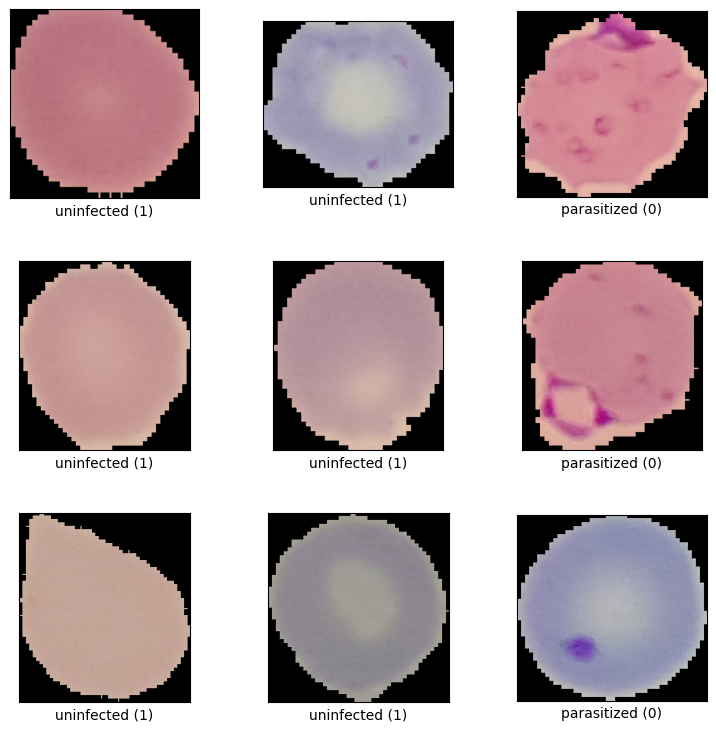

In [ ]:
# Print train dataset
data = tfds.show_examples(ds_train, ds_info, rows=3, cols=3)

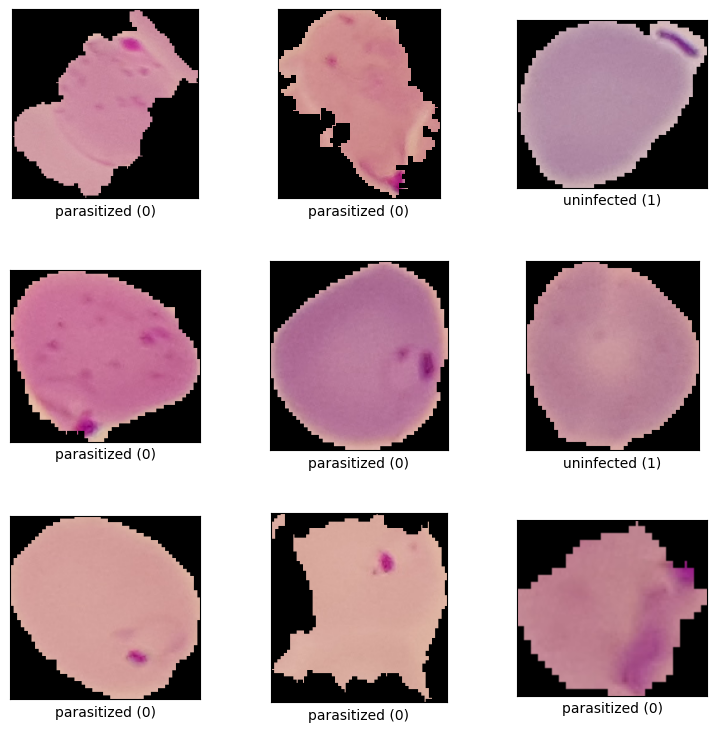

In [ ]:
# Print test dataset
data = tfds.show_examples(ds_test, ds_info, rows=3, cols=3)

**DATA PRE-PROCESSING**

In [ ]:
def img_process(image, label):
  """
  define a function that takes in the image and label as inputs,
  converts the data type of the image, normalize and
  returns the image and labels
  """
  image = tf.image.convert_image_dtype(image, tf.float32)  # Convert image to float32
  image = tf.image.resize(image, [150, 150])  # Resize  the image

  return image, label

In [ ]:
# Construct the Training and Test datasets
(ds_train, ds_test), ds_info = tfds.load(
    "malaria",
    # Splitting the dataset into training and test
    split=["train[:80%]", "train[80%:]"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Training dataset
ds_train = ds_train.map(img_process, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(buffer_size=1000)
ds_train = ds_train.batch(64)
ds_train = ds_train.prefetch(buffer_size=tf.data.AUTOTUNE)

# Test dataset
ds_test = ds_test.map(img_process, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(buffer_size=tf.data.AUTOTUNE)

**CUSTOM MODEL DEFINITION**

In [ ]:
# Custom model
model = Sequential()

# First layer
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

# Second layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

# Third layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

# Flatten layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [ ]:
# Compile the model
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(ds_train,
    epochs=10,
    validation_data=ds_test
)

Epoch 1/10
345/345 [==============================] - 577s 2s/step - loss: 0.6138 - accuracy: 0.6564 - val_loss: 0.3436 - val_accuracy: 0.9307
Epoch 2/10
345/345 [==============================] - 520s 2s/step - loss: 0.2708 - accuracy: 0.9203 - val_loss: 0.1973 - val_accuracy: 0.9416
Epoch 3/10
345/345 [==============================] - 566s 2s/step - loss: 0.2070 - accuracy: 0.9387 - val_loss: 0.1770 - val_accuracy: 0.9441
Epoch 4/10
345/345 [==============================] - 547s 2s/step - loss: 0.1854 - accuracy: 0.9437 - val_loss: 0.1902 - val_accuracy: 0.9439
Epoch 5/10
345/345 [==============================] - 547s 2s/step - loss: 0.1704 - accuracy: 0.9486 - val_loss: 0.1688 - val_accuracy: 0.9508
Epoch 6/10
345/345 [==============================] - 510s 1s/step - loss: 0.1597 - accuracy: 0.9512 - val_loss: 0.1643 - val_accuracy: 0.9519
Epoch 7/10
345/345 [==============================] - 551s 2s/step - loss: 0.1562 - accuracy: 0.9526 - val_loss: 0.1661 - val_accuracy: 0.9507

In [ ]:
history.history

{'loss': [0.6138406991958618,
  0.2707730531692505,
  0.20696699619293213,
  0.18537098169326782,
  0.17035026848316193,
  0.1597416251897812,
  0.15618306398391724,
  0.14559467136859894,
  0.14309515058994293,
  0.13187308609485626],
 'accuracy': [0.6564002633094788,
  0.9203483462333679,
  0.9387190341949463,
  0.943708598613739,
  0.9486074447631836,
  0.9512383341789246,
  0.9525537490844727,
  0.9539598822593689,
  0.9551392793655396,
  0.9558196663856506],
 'val_loss': [0.34362298250198364,
  0.1973246932029724,
  0.17696619033813477,
  0.190216526389122,
  0.1687902808189392,
  0.16427730023860931,
  0.16605421900749207,
  0.16115042567253113,
  0.16334939002990723,
  0.16555987298488617],
 'val_accuracy': [0.9306966662406921,
  0.9415820240974426,
  0.9441218972206116,
  0.9439405202865601,
  0.9508345723152161,
  0.9519230723381042,
  0.9506531357765198,
  0.9522859454154968,
  0.9530116319656372,
  0.9502902626991272]}

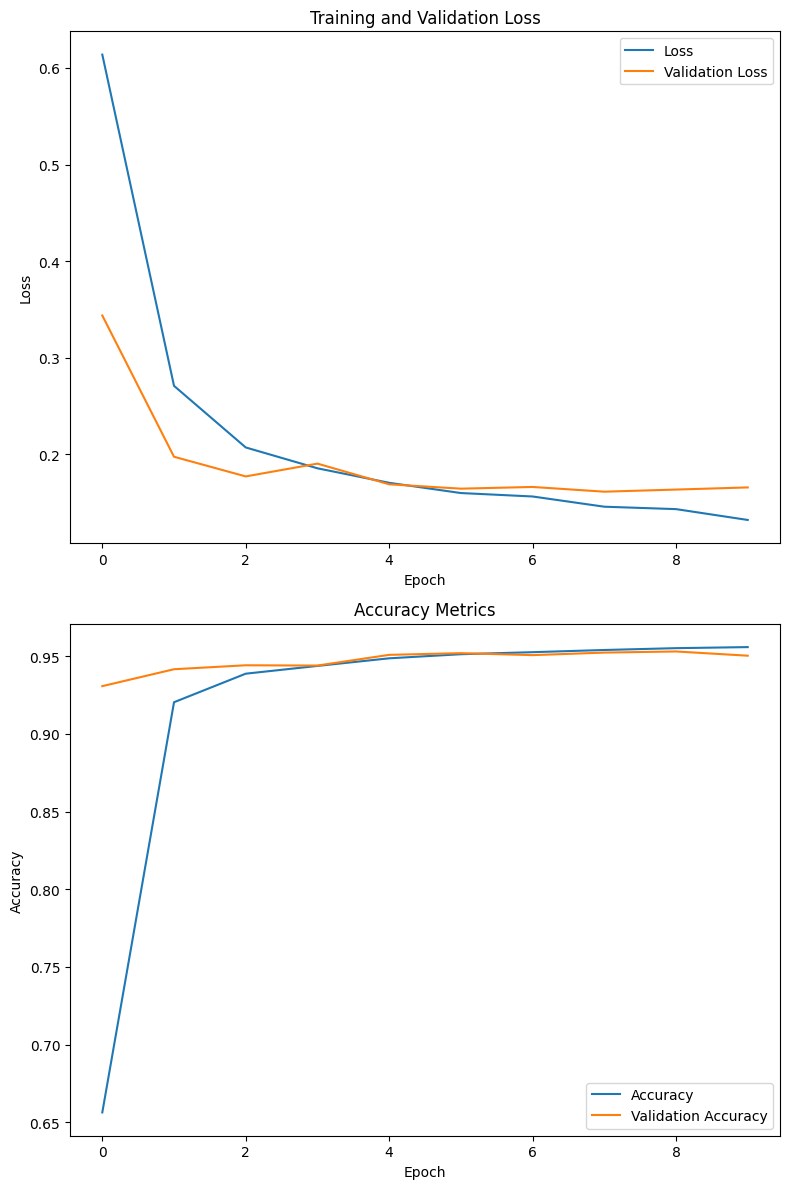

In [ ]:
# Create a figure and axis object with subplots
fig, ax = plt.subplots(2, figsize=(8, 12))

# Plotting Training and Validation Loss
ax[0].plot(history.history['loss'], label='Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plotting Accuracy Metrics
ax[1].plot(history.history['accuracy'], label='Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy Metrics')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()